In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path("..").resolve()))

from src.embeddings_database import AutoFaissIndex
import random
from collections import defaultdict
from src.data import get_all_data

In [2]:
images_folder_path = Path("data/kaggle_ashwingupta3012/Images/")
images = list(images_folder_path.glob("*"))
images_sample = random.sample(images, 5)

### Store the embeddings

In [7]:
combined_data_dict = get_all_data(main_data_folder="data/",
                 metadata_to_keep=["name", "keywords"])

new_dict = defaultdict(list)
for i in range(1000):
    new_dict['img_path'].append(combined_data_dict['img_path'][i])
    new_dict['name'].append(combined_data_dict['source_name'][i])
    new_dict['keywords'].append(combined_data_dict['source_keywords'][i])

In [8]:
data_folder = "embeddings_store"
face_detect_model = "models/face_detect/mediapipe/"
embeddings_model = "models/embeddings/deepface/"
n_threshold = 100_000

In [9]:
faiss_index = AutoFaissIndex(
                 index_path=data_folder,
                 face_detect_model=face_detect_model,
                 embeddings_model=embeddings_model,
                 n_threshold=n_threshold
)

In [10]:
from src.image import show_image

In [11]:
faiss_index.populate_images(new_dict)

[INFO] Initializing the models...
[INFO] Loading DeepFace model: ArcFace ...
[INFO] Model 'ArcFace' loaded successfully.


Populating FAISS index: 100%|████████████████████████████████████████████████████████████████| 1000/1000 [03:57<00:00,  4.21image/s]


In [22]:
n = 3500

In [23]:
scores, ids, metadata = faiss_index.search_image(images[n])

In [24]:
scores

array([[12.852545, 12.852545,  8.160212,  8.160212,  8.160212]],
      dtype=float32)

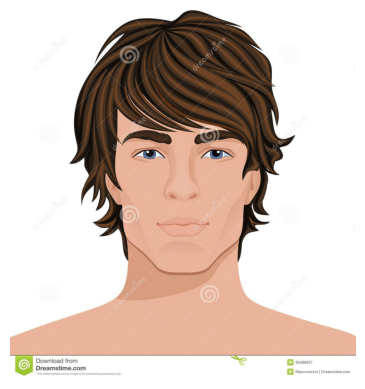

In [25]:
show_image(images[n])

data\kaggle_ashwingupta3012\images\1 (1417).jpg


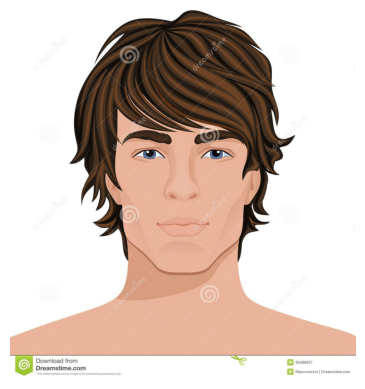

data\kaggle_ashwingupta3012\images\1 (1103).jpg


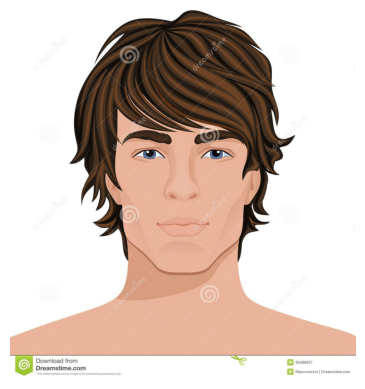

data\kaggle_ashwingupta3012\images\1 (1447).jpg


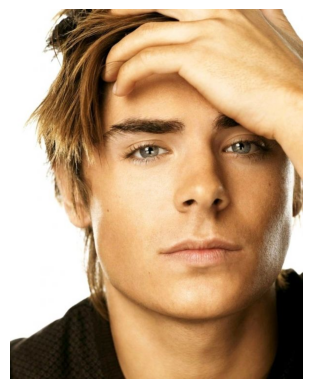

data\kaggle_ashwingupta3012\images\1 (1193).jpg


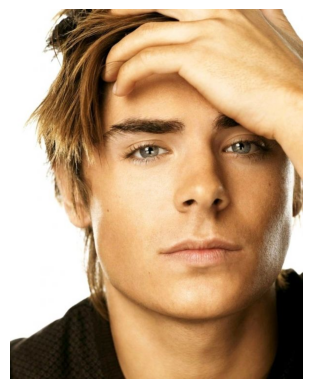

data\kaggle_ashwingupta3012\images\1 (1081).jpg


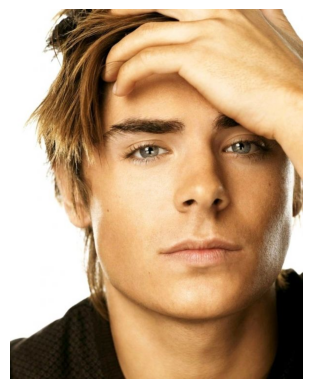

In [26]:
for i in ids[0]:
    path = metadata[0].loc[i, "img_path"]
    print(path)
    show_image(path)

In [17]:
metadata[0]

,id,img_path,name,keywords
40,40,data\kaggle_ashwingupta3012\images\1 (1031).jpg,kaggle_ashwingupta3012,"real, fake"
90,90,data\kaggle_ashwingupta3012\images\1 (1079).jpg,kaggle_ashwingupta3012,"real, fake"
95,95,data\kaggle_ashwingupta3012\images\1 (1083).jpg,kaggle_ashwingupta3012,"real, fake"
99,99,data\kaggle_ashwingupta3012\images\1 (1087).jpg,kaggle_ashwingupta3012,"real, fake"
106,106,data\kaggle_ashwingupta3012\images\1 (1094).jpg,kaggle_ashwingupta3012,"real, fake"
